In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = "movies_db.nosync/"
movies = pd.read_csv(DATA_FOLDER+"movies_metadata.csv")
ratings = pd.read_csv(DATA_FOLDER+"ratings.csv")


/Users/salimhuneidi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print('movies: ', movies.shape)
print('ratings:', ratings.shape)

movies:  (45466, 24)
ratings: (26024289, 4)


# Removing Duplicates

In [4]:
# ratings difficult to find duplicates or has no duplicates
print('ratings duplicates: ',ratings[ratings[['userId','movieId']].duplicated() == True])# no duplicates 
duplicated_movies =  movies[movies[['title', 'release_date']].duplicated() == True]
movies = movies[movies[['title']].duplicated() == False]
duplicated_movies.head(3)

ratings duplicates:  Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1465,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
9165,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,...,1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0
9327,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",...,2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.3,15.0


# Most Popular Movies

In [5]:
movies = movies[movies['popularity'].isna() == False]
movies['popularity'] = movies['popularity'].astype(float).astype('int32')
movies[['original_title', 'genres', 'popularity']].sort_values(by=['popularity'], ascending= False).head(5)

,original_title,genres,popularity
30700,Minions,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",547
43644,Baby Driver,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",228
24455,Big Hero 6,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",213
26564,Deadpool,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",187
26566,Guardians of the Galaxy Vol. 2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",185


# Movies with biggest budgets and runtime 

In [24]:
movies[['original_title','budget','runtime']].sort_values(by=['budget', 'runtime'], ascending= False).head(20)

,original_title,budget,runtime
34215,The Peanuts Movie,99000000,88.0
39842,Unfriend,9900000,92.0
39688,Don't Breathe,9900000,88.0
39793,Elle,9804690,130.0
4142,The Mummy Returns,98000000,130.0
14,Cutthroat Island,98000000,119.0
3424,What Ever Happened to Baby Jane?,980000,135.0
13331,The Lazarus Project,9750000,99.0
14710,Astérix aux Jeux Olympiques,97250400,116.0
42902,Alien: Covenant,97000000,122.0


# Movie Genres

In [7]:
movies['genres'] = movies['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movie_genres = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True).unique()
movie_genres

array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', 'Western', 'TV Movie'], dtype=object)

# Selecting only movies with over 100 ratings 

In [8]:
movies = movies[movies['vote_count']>100]

# Merging movies with ratings 

In [9]:
# merge 
movies['id']=movies['id'].astype('int64') 
movies_ratings = movies.merge(ratings, left_on="id", right_on='movieId', how='inner')
movies_ratings.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,userId,movieId,rating,timestamp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,1923,862,3.0,858335006
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,2103,862,5.0,946044912
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,5380,862,1.0,878941641
3,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,6177,862,4.0,859415226
4,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,6525,862,4.0,857388995


# Columns Na values and drop columns not used 

In [10]:
print(movies_ratings.isnull().sum())
movies_ratings = movies_ratings.drop(columns = ['adult','belongs_to_collection', 'homepage', 'imdb_id', 'original_language','overview','poster_path','timestamp','video','vote_average','tagline'])

adult                          0
belongs_to_collection    4169954
budget                         0
genres                         0
homepage                 4377883
id                             0
imdb_id                        0
original_language              0
original_title                 0
overview                       0
popularity                     0
poster_path                    0
production_companies           0
production_countries           0
release_date                   0
revenue                        0
runtime                        0
spoken_languages               0
status                         0
tagline                   582151
title                          0
video                          0
vote_average                   0
vote_count                     0
userId                         0
movieId                        0
rating                         0
timestamp                      0
dtype: int64


# Ratings Sum 

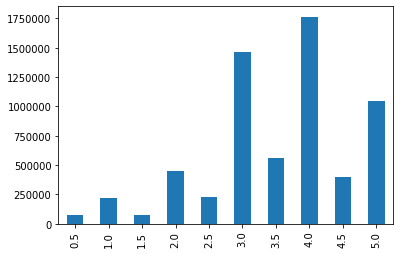

In [11]:
rating_sum = movies_ratings['rating'].value_counts(sort=False, ascending=False)
rating_sum = rating_sum.reindex(sorted(rating_sum.index), axis=1)
rating_sum.plot.bar()

# movies genres

In [12]:
genre_dict={}
for i in movie_genres:
    genre_dict[i]=0

In [13]:
for i in movies['genres']:
    for j in i:
        genre_dict[j] +=1

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

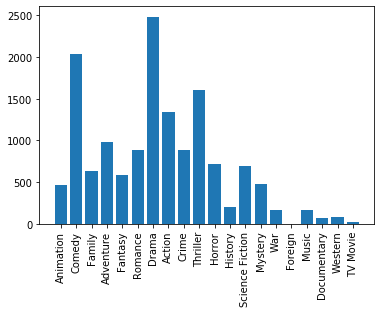

In [15]:
plt.bar(x=genre_dict.keys(), height=genre_dict.values())
plt.xticks(rotation=90)

In [17]:
ratings['rating'].describe()

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64